# 7. Monte Carlo methods

In previous sections we have encountered certain methods like gradient ascent/descent and the EM algorithm, which allow us to find approximate solutions to problems in which an exact solution cannot be found. This section deals with another class of methods referred to broadly as Monte Carlo, which use random sampling to obtain approximate answers to analytically intractable or otherwise difficult problems. Two useful applications of MC are evaluating integrals and sampling from intractable distributions.

\begin{align}
I = \int f(x) dx = \int e^{-\big(\frac{1}{10}x^4 - \frac{1}{10}x^3 - \frac{1}{2}x^2\big)} dx.
\end{align}

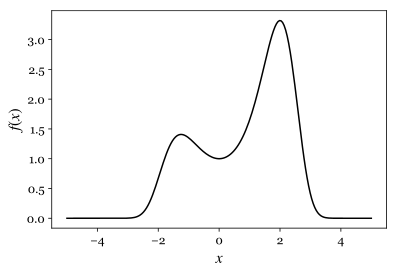

In [25]:
x = np.linspace(-5, 5, 200)
y = np.exp(-(0.1*x**4 - 0.1*x**3 - 0.5*x**2))

plt.plot(x, y, color = 'black')
beautify_plot({"x":"$x$", "y":"$f(x)$"})
plt.show()

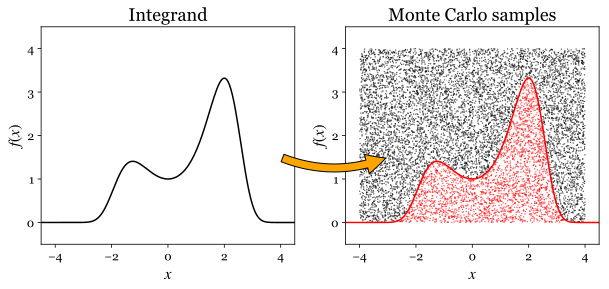

In [26]:
max_x, min_x, max_y, min_y = 4, -4, 4, 0

fig = plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
x = np.linspace(-5, 5, 200)
y = np.exp(-(0.1*x**4 - 0.1*x**3 - 0.5*x**2))

plt.plot(x, y, color = 'black')
beautify_plot({'title':'Integrand', "x":"$x$", "y":"$f(x)$"})
plt.xlim([min_x-0.5, max_x+0.5]), plt.ylim([min_y-0.5, max_y+0.5])
ax_0 = plt.gca()

plt.subplot(1, 2, 2)
no_samples = 10**4

samples = np.random.uniform([min_x, min_y], [max_x, max_y], (no_samples, 2))

x_ = samples[:, 0]
y_ = np.exp(-(0.1*x_**4 - 0.1*x_**3 - 0.5*x_**2))
counts = len(np.where(samples[:, 1] <= y_)[0])

area = (max_x - min_x)*(max_y - min_y)

colors = np.array(['black', 'red'])[(samples[:, 1] <= y_)*1]
plt.scatter(samples[:, 0], samples[:, 1], s = 0.1, color = colors)
plt.plot(x, y, color = 'red')
plt.xlim([min_x-0.5, max_x+0.5]), plt.ylim([min_y-0.5, max_y+0.5])
beautify_plot({"title": "Monte Carlo samples", "x":"$x$", "y":"$f(x)$"})
ax_1 = plt.gca()

ax0tr = ax_0.transData # Axis 0 -> Display
ax1tr = ax_1.transData # Axis 1 -> Display
figtr = fig.transFigure.inverted() # Display -> Figure
# 2. Transform arrow start point from axis 0 to figure coordinates
ptB = figtr.transform(ax0tr.transform((4, 1.5)))
# 3. Transform arrow end point from axis 1 to figure coordinates
ptE = figtr.transform(ax1tr.transform((-3, 1.5)))
# 4. Create the patch
arrow = matplotlib.patches.FancyArrowPatch(
    ptB, ptE, transform=fig.transFigure,  # Place arrow in figure coord system
    fc = "orange", connectionstyle="arc3,rad=0.2", arrowstyle='simple', alpha = 1,
    mutation_scale = 40.)
# 5. Add patch to list of objects to draw onto the figure

fig.patches.append(arrow)

plt.show()

Instead of searching for an analytic solution we can approximate this integral using Monte Carlo.

In [27]:
# The usual notebook preferences
%config InlineBackend.figure_format = 'svg'
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from helper_functions import *
set_notebook_preferences()

In [28]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## 7.1 Example: approximating $\pi$



In [29]:
no_samples = 10000

samples = np.random.rand(no_samples, 2)
radii = np.sum(samples**2, axis = 1)**0.5
keeps = np.where(radii < 1)[0]

pi_approx = 4*len(keeps)/no_samples
print(pi_approx)

3.122


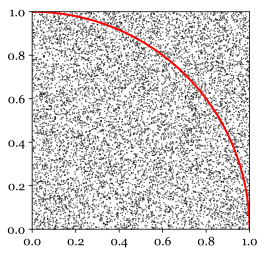

In [30]:
plt.scatter(samples[:, 0], samples[:, 1], s = 0.1, color = 'black')
ax = plt.gca()
ax.add_artist(plt.Circle((0, 0), 1, color = 'red', fill = False, linewidth = 2))
plt.xlim([0, 1]), plt.ylim([0, 1])
ax.set_aspect('equal')
plt.show()

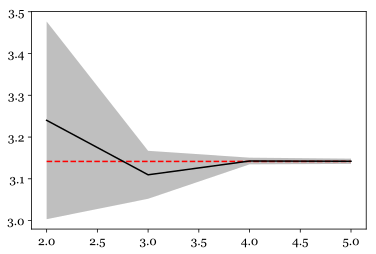

In [31]:
sample_sizes = np.array([10**2, 10**3, 10**4, 10**5])
trials_per_size = 10

mean_pies = []
sig_pies = []
for no_samples in sample_sizes:
    
    pies = []
    for n in range(trials_per_size):
        
        samps = np.random.rand(no_samples, 2)
        keeps = np.where(np.sum(samps**2, axis = 1)**0.5 < 1)[0]
        
        pies.append(4*len(keeps)/no_samples)
        
    mean_pies.append(np.array(pies).mean())
    sig_pies.append(np.array(pies).var()**0.5)
    
mean_pies = np.array(mean_pies)
sig_pies = np.array(sig_pies)
  
plt.plot(np.log10(sample_sizes), np.ones_like(sample_sizes)*np.pi, '--', color = 'red')
plt.plot(np.log10(sample_sizes), mean_pies, color = 'black')
plt.fill_between(np.log10(sample_sizes), mean_pies + sig_pies, mean_pies - sig_pies, facecolor = 'grey', alpha = 0.5)
plt.show()

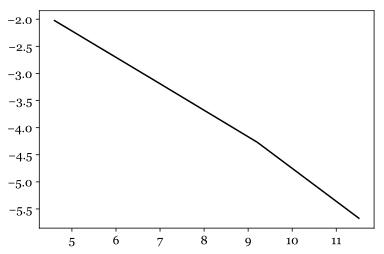

In [32]:
errors = []
sample_sizes = np.array([10**2, 10**3, 10**4, 10**5])
samples_per_size = 10**6

for no_samples in sample_sizes:
    
    no_reps = int(samples_per_size/no_samples)
    mean_error = 0
    for n in range(no_reps):
        
        samps = np.random.rand(no_samples, 2)
        keeps = np.where(np.sum(samps**2, axis = 1)**0.5 < 1)[0]
        
        mean_error += np.abs(np.pi - 4*len(keeps)/no_samples)
    
    errors.append(mean_error/no_reps)

plt.plot(np.log(sample_sizes), np.log(errors), color = 'black')
plt.show()

In [33]:
slope = stats.linregress(np.log(sample_sizes), np.log(errors))[0]
slope

-0.52400994798527856

## Example: approximating intractable integral

\begin{align}
I = \int e^{-(\frac{1}{10}x^4 - \frac{1}{10}x^3 - \frac{1}{2}x^2)} dx
\end{align}

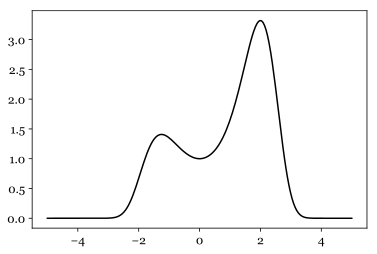

In [34]:
x = np.linspace(-5, 5, 200)
y = np.exp(-(0.1*x**4 - 0.1*x**3 - 0.5*x**2))

plt.plot(x, y, color = 'black')
plt.show()

In [35]:
no_samples = 10**4
max_x, min_x, max_y, min_y = 4, -4, 4, 0

samples = np.random.uniform([min_x, min_y], [max_x, max_y], (no_samples, 2))

x_ = samples[:, 0]
y_ = np.exp(-(0.1*x_**4 - 0.1*x_**3 - 0.5*x_**2))
counts = len(np.where(samples[:, 1] <= y_)[0])

area = (max_x - min_x)*(max_y - min_y)
print(counts/no_samples*area)

8.4288


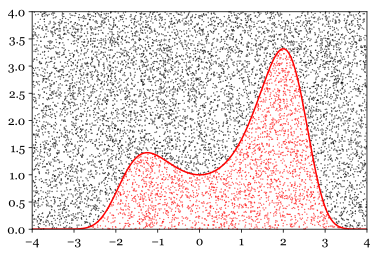

In [36]:
colors = np.array(['black', 'red'])[(samples[:, 1] <= y_)*1]
plt.scatter(samples[:, 0], samples[:, 1], s = 0.1, color = colors)
plt.plot(x, y, color = 'red')
plt.xlim([min_x, max_x]), plt.ylim([min_y, max_y])
plt.show()

In [37]:
approx = []

for n in range(10):
    samples = np.random.uniform([min_x, min_y], [max_x, max_y], (no_samples, 2))

    x_ = samples[:, 0]
    y_ = np.exp(-(0.1*x_**4 - 0.1*x_**3 - 0.5*x_**2))
    approx.append(len(np.where(samples[:, 1] <= y_)[0])/no_samples*area)
    
approx = np.array(approx)
print("Approximate integral: {:.3f}, Error estimate {:.3f}".format(approx.mean(), approx.var()**0.5))

Approximate integral: 8.469, Error estimate 0.087


## Exact sampling

In [1]:
cdf_samples = np.random.rand(10000)
pdf_samples = np.tan(np.pi*cdf_samples - np.pi/2)
pdf_samples = pdf_samples[np.where(abs(pdf_samples) < 20)[0]]
plt.hist(pdf_samples, range = (-20, 20), bins = 60, color = 'blue',
         alpha = 0.2, edgecolor='black', linewidth = 1.2, normed = True)
xs = np.linspace(-20, 20, 500)
plt.plot(xs, (1/np.pi)/(1 + xs**2), color = 'black')
plt.show()

NameError: name 'np' is not defined

## Rejection sampling

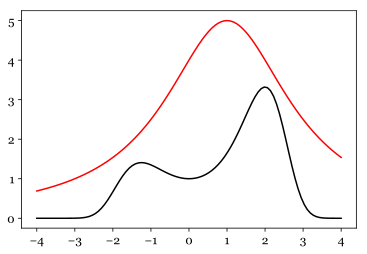

In [39]:
x_ = np.linspace(-4, 4, 100)
y_prob = np.exp(-(0.1*x_**4 - 0.1*x_**3 - 0.5*x_**2))
width = 2
mean = 1
height = 20
y_approx = height/(width**2 + (x_ - mean)**2)

plt.plot(x_, y_prob, 'black')
plt.plot(x_, y_approx, 'red')
plt.show()

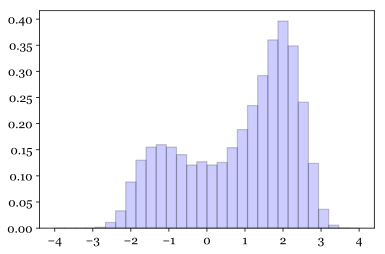

In [40]:
no_samples = 10**5
cdf_samples = np.random.rand(no_samples)
u = np.random.rand(no_samples)
pdf_samples = width*np.tan(np.pi*cdf_samples - np.pi/2) + mean
Mq = height/(width**2 + (pdf_samples - mean)**2)
p = np.exp(-(0.1*pdf_samples**4 - 0.1*pdf_samples**3 - 0.5*pdf_samples**2))
samples_kept = pdf_samples[np.where(Mq*u < p)]

plt.hist(samples_kept, range = (-4, 4), bins = 30, color = 'blue',
         alpha = 0.2, edgecolor='black', linewidth = 1.2, normed = True)
plt.show()

After drawing the samples we can use them for other purposes, such as to evaluate an expectation:

\begin{align}
I &= \int p(x)f(x) dx,\\
p(x) &\propto e^{-(\frac{1}{10}x^4 - \frac{1}{10}x^3 - \frac{1}{2}x^2)}\\
\end{align}

In [41]:
no_samples_kept = samples_kept.shape[0]
samples_kept.mean()

0.83082601167478676

## Importance sampling

In [42]:
no_samples = 10**5
cdf_samples = np.random.rand(no_samples)
pdf_samples = width*np.tan(np.pi*cdf_samples - np.pi/2) + mean
q = 1/(width**2 + (pdf_samples - mean)**2)
p = np.exp(-(0.1*pdf_samples**4 - 0.1*pdf_samples**3 - 0.5*pdf_samples**2))

w = p/q

np.sum(pdf_samples*w/w.sum())

0.82870138135435711